# Sample Code for understanding GLCM Feature Extraction

In [1]:
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops
from skimage import io
import cv2
import numpy as np

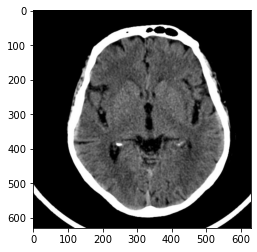

In [2]:
PATCH_SIZE = 35

image = io.imread('Sample_Images/sample1.jpg')
plt.imshow(image, cmap='gray')

In [3]:
#Convert Image to a 2D array
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
print(image.shape)

(630, 630)


In [5]:
GLCM = greycomatrix(image, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4])
a= greycoprops(GLCM, 'energy')[0, 0]
print('Energy = ',a)

Energy =  0.4554854404518003


In [6]:
# select some patches from Brain areas of the image
cell_locations = [(200, 250), (200, 400), (450, 200), (450, 450)]
cell_patches = []
for loc in cell_locations:
    cell_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

# select some patches from Outer areas of the image
scratch_locations = [(50, 50), (50, 500), (550, 200), (550, 500)]
scratch_patches = []
for loc in scratch_locations:
    scratch_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                             loc[1]:loc[1] + PATCH_SIZE])

In [7]:
# Calculating GLCM features for the image patches
diss_sim = []
corr = []
homogen = []
energy = []
contrast = []
for patch in (cell_patches + scratch_patches):
    glcm = greycomatrix(patch, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
    diss_sim.append(greycoprops(glcm, 'dissimilarity')[0, 0]) #[0,0] to convert array to value
    corr.append(greycoprops(glcm, 'correlation')[0, 0])
    homogen.append(greycoprops(glcm, 'homogeneity')[0, 0])
    energy.append(greycoprops(glcm, 'energy')[0, 0])
    contrast.append(greycoprops(glcm, 'contrast')[0, 0])

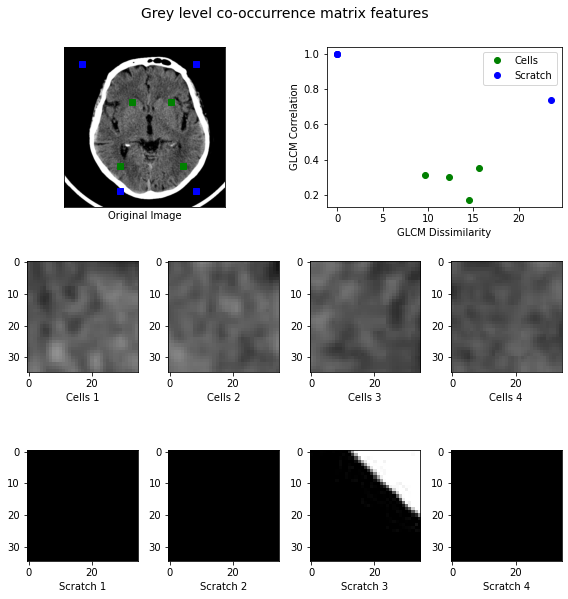

In [8]:
#PLOTTING for Visualization of points and patches
# create the figure
fig = plt.figure(figsize=(8, 8))

# display original image with locations of patches
ax = fig.add_subplot(3, 2, 1)
ax.imshow(image, cmap=plt.cm.gray,
          vmin=0, vmax=255)
for (y, x) in cell_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for (y, x) in scratch_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
ax.set_xlabel('Original Image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(3, 2, 2)
ax.plot(diss_sim[:len(cell_patches)], corr[:len(cell_patches)], 'go',
        label='Cells')
ax.plot(diss_sim[len(cell_patches):], corr[len(cell_patches):], 'bo',
        label='Scratch')
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()

# display the image patches
for i, patch in enumerate(cell_patches):
    ax = fig.add_subplot(3, len(cell_patches), len(cell_patches)*1 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Cells %d' % (i + 1))

for i, patch in enumerate(scratch_patches):
    ax = fig.add_subplot(3, len(scratch_patches), len(scratch_patches)*2 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Scratch %d' % (i + 1))


# display the patches and plot
fig.suptitle('Grey level co-occurrence matrix features', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()